In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
from matplotlib import colors
import shapely
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap    
%matplotlib inline
pd.set_option('display.height',1000)
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',500)
pd.set_option("display.width", 1000)

### Objective
The objective of this notebook is to aggregate the data from the Census Bureau by Water District


In [5]:
# bg10 = gp.GeoDataFrame.from_file('../Data/GeoData/BG2010/tl_2010_06_bg10_Complete_Solved_Overlaps.geojson')
# print(bg10.shape)
# bg10.head(1)

In [6]:
# wa_d = gp.GeoDataFrame.from_file('../Data/Supplier/suppliers.geojson')
# print wa_d.shape
# wa_d.head(3)

### Methodology
Census Data by BlockGroup in California:
- Household Income
- Race
- Education Level

The methodology consists in merging the census data with the data generated in the previous notebook, adding the PWSID (assigned water district) as a column that describes the blockgroups. This allows to group the Census Data by Water District. The aggregated data is saved as geojson file having as well the shape from each water district. The process is repeated in each of the 3 variables downloaded from Fact Finder.


In [2]:
#Downloaded from Census Bureau Fact Finder
house_income = pd.read_csv('Census_Data/Household_Income/ACS_16_5YR_B19001/ACS_16_5YR_B19001_with_ann.csv', header=1)
house_size = pd.read_csv('Census_Data/Household_Size/ACS_16_5YR_B25009/ACS_16_5YR_B25009_with_ann.csv', header=1)
df_bg_wd = pd.read_csv('../data/blockgroups_joined_suppliers.csv')

print(house_income.shape)

# house_income['GEOID10'] = house_income.Id.apply(lambda x: x[9:])
# house_income.drop(['Id','Id2'],inplace=True, axis=1)

(23212, 37)


In [3]:
df_bg_wd.columns.values

array(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'city',
       'county', 'supplier_name', 'pwsid'], dtype=object)

In [4]:
house_income = df_bg_wd[['GEOID', 'supplier_name', 'pwsid']].merge(house_income, left_on ='GEOID', 
                                                                   right_on='Id2', how='left')

house_size = df_bg_wd[['GEOID', 'supplier_name', 'pwsid']].merge(house_size, left_on ='GEOID', 
                                                                   right_on='Id2', how='left')

In [7]:
house_income.drop(['GEOID', 'Id2'],inplace=True, axis=1)
house_income_byWaD = house_income.groupby(['supplier_name', 'pwsid']).sum()
house_income_byWaD.head()

,,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Margin of Error; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Margin of Error; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Margin of Error; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Margin of Error; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Margin of Error; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Margin of Error; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Margin of Error; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Margin of Error; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Margin of Error; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Margin of Error; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Margin of Error; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Margin of Error; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more","Margin of Error; Total: - $200,000 or more"
supplier_name,pwsid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelanto City of,CA3610001,345,93,42,34,41,50,64,51,51,50,33,25,48,45,20,20,0,12,9,14,10,15,0,12,15,24,0,12,0,12,12,15,0,12
Alameda County Water District,CA0110001,105006,15484,2646,3696,2329,3485,1894,3283,2571,3785,2556,3815,2540,3736,2487,3695,2484,3607,2646,3777,5453,5276,7825,6584,13910,8638,13440,8539,10169,7341,14691,8776,17365,8564
Alco Water Service,CA2710001,12434,2062,416,568,496,618,763,783,760,790,769,741,709,696,785,765,818,776,793,775,1214,1015,1328,984,1470,987,769,732,612,623,413,580,319,493
Alhambra City of,CA1910001,29137,4332,2173,1807,1598,1486,1818,1638,1622,1604,1425,1502,1216,1315,1224,1340,1330,1408,1176,1308,2386,1895,2720,1943,3299,2213,2732,1942,1573,1511,1494,1398,1351,1425
"American Canyon, City of",CA2810005,6037,798,205,234,185,245,213,244,225,231,227,285,149,176,175,199,274,268,215,226,302,258,518,339,881,480,578,395,613,393,577,328,700,371


In [8]:
house_size.drop(['GEOID', 'Id2'],inplace=True, axis=1)
house_size_byWaD = house_size.groupby(['supplier_name', 'pwsid']).sum()
house_size_byWaD.head()

,,Estimate; Total:,Margin of Error; Total:,Estimate; Owner occupied:,Margin of Error; Owner occupied:,Estimate; Owner occupied: - 1-person household,Margin of Error; Owner occupied: - 1-person household,Estimate; Owner occupied: - 2-person household,Margin of Error; Owner occupied: - 2-person household,Estimate; Owner occupied: - 3-person household,Margin of Error; Owner occupied: - 3-person household,Estimate; Owner occupied: - 4-person household,Margin of Error; Owner occupied: - 4-person household,Estimate; Owner occupied: - 5-person household,Margin of Error; Owner occupied: - 5-person household,Estimate; Owner occupied: - 6-person household,Margin of Error; Owner occupied: - 6-person household,Estimate; Owner occupied: - 7-or-more person household,Margin of Error; Owner occupied: - 7-or-more person household,Estimate; Renter occupied:,Margin of Error; Renter occupied:,Estimate; Renter occupied: - 1-person household,Margin of Error; Renter occupied: - 1-person household,Estimate; Renter occupied: - 2-person household,Margin of Error; Renter occupied: - 2-person household,Estimate; Renter occupied: - 3-person household,Margin of Error; Renter occupied: - 3-person household,Estimate; Renter occupied: - 4-person household,Margin of Error; Renter occupied: - 4-person household,Estimate; Renter occupied: - 5-person household,Margin of Error; Renter occupied: - 5-person household,Estimate; Renter occupied: - 6-person household,Margin of Error; Renter occupied: - 6-person household,Estimate; Renter occupied: - 7-or-more person household,Margin of Error; Renter occupied: - 7-or-more person household
supplier_name,pwsid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelanto City of,CA3610001,345,93,98,54,21,26,46,33,0,12,16,25,0,12,0,12,15,24,247,93,35,24,34,32,96,70,48,52,34,36,0,12,0,12
Alameda County Water District,CA0110001,105006,15484,66548,13692,8232,6023,19179,8957,14408,8222,14516,8182,5875,5322,2809,3795,1529,2919,38458,12638,6484,5150,9547,6643,8686,6782,7709,6583,3460,4454,1658,3234,914,2685
Alco Water Service,CA2710001,12434,2062,6015,1583,572,591,1322,804,893,786,1202,929,843,659,691,718,492,565,6419,1832,534,581,792,796,753,746,1429,1018,1458,1034,713,701,740,718
Alhambra City of,CA1910001,29137,4332,11771,3323,2549,1766,3321,1993,2471,1723,1919,1576,840,1088,351,831,320,803,17366,4044,4630,2600,5062,2743,3515,2134,2638,2076,990,1235,300,808,231,799
"American Canyon, City of",CA2810005,6037,798,4678,782,565,357,1241,502,842,460,1053,463,552,354,293,261,132,154,1359,568,229,233,404,316,131,182,174,231,302,296,75,166,44,131


In [9]:
house_income_byWaD.reset_index(inplace=True)
house_size_byWaD.reset_index(inplace=True)

In [10]:

# wa_d.rename(columns={'pwsid':'PWSID'},inplace=True)
# house_income_byWaD = house_income_byWaD.merge(wa_d[['PWSID','supplier_n','geometry']], on='PWSID',how='left')
# house_income_byWaD = gp.GeoDataFrame(house_income_byWaD[:-1], geometry='geometry')
perhouse = [ 'Margin of Error; Total:',
 'Estimate; Total: - Less than $10,000',
 'Margin of Error; Total: - Less than $10,000',
 'Estimate; Total: - $10,000 to $14,999',
 'Margin of Error; Total: - $10,000 to $14,999',
 'Estimate; Total: - $15,000 to $19,999',
 'Margin of Error; Total: - $15,000 to $19,999',
 'Estimate; Total: - $20,000 to $24,999',
 'Margin of Error; Total: - $20,000 to $24,999',
 'Estimate; Total: - $25,000 to $29,999',
 'Margin of Error; Total: - $25,000 to $29,999',
 'Estimate; Total: - $30,000 to $34,999',
 'Margin of Error; Total: - $30,000 to $34,999',
 'Estimate; Total: - $35,000 to $39,999',
 'Margin of Error; Total: - $35,000 to $39,999',
 'Estimate; Total: - $40,000 to $44,999',
 'Margin of Error; Total: - $40,000 to $44,999',
 'Estimate; Total: - $45,000 to $49,999',
 'Margin of Error; Total: - $45,000 to $49,999',
 'Estimate; Total: - $50,000 to $59,999',
 'Margin of Error; Total: - $50,000 to $59,999',
 'Estimate; Total: - $60,000 to $74,999',
 'Margin of Error; Total: - $60,000 to $74,999',
 'Estimate; Total: - $75,000 to $99,999',
 'Margin of Error; Total: - $75,000 to $99,999',
 'Estimate; Total: - $100,000 to $124,999',
 'Margin of Error; Total: - $100,000 to $124,999',
 'Estimate; Total: - $125,000 to $149,999',
 'Margin of Error; Total: - $125,000 to $149,999',
 'Estimate; Total: - $150,000 to $199,999',
 'Margin of Error; Total: - $150,000 to $199,999',
 'Estimate; Total: - $200,000 or more',
 'Margin of Error; Total: - $200,000 or more']

for col in perhouse:
    house_income_byWaD['Per_'+col] = (house_income_byWaD[col]/house_income_byWaD['Estimate; Total:'])*100
    
for WD in house_income_byWaD.index:
    for i in range(len(perhouse[1::2])):
        if house_income_byWaD.loc[WD][perhouse[1::2][:i]].sum() >= (house_income_byWaD.loc[WD,'Estimate; Total:']/float(2)):
            house_income_byWaD.loc[WD,'Median Household Income'] = perhouse[1::2][i]
            house_income_byWaD.loc[WD,'Median Household Income Count'] = (house_income_byWaD.loc[WD][perhouse[1::2][:i]].sum()/float(house_income_byWaD.loc[WD,'Estimate; Total:']))*100
            break
# with open('../Data/Supplier/Household_Income_Water_District.geojson', 'w') as f:
#     f.write(house_income_byWaD.to_json())

In [11]:
house_size_byWaD.columns.values

array(['supplier_name', 'pwsid', 'Estimate; Total:',
       'Margin of Error; Total:', 'Estimate; Owner occupied:',
       'Margin of Error; Owner occupied:',
       'Estimate; Owner occupied: - 1-person household',
       'Margin of Error; Owner occupied: - 1-person household',
       'Estimate; Owner occupied: - 2-person household',
       'Margin of Error; Owner occupied: - 2-person household',
       'Estimate; Owner occupied: - 3-person household',
       'Margin of Error; Owner occupied: - 3-person household',
       'Estimate; Owner occupied: - 4-person household',
       'Margin of Error; Owner occupied: - 4-person household',
       'Estimate; Owner occupied: - 5-person household',
       'Margin of Error; Owner occupied: - 5-person household',
       'Estimate; Owner occupied: - 6-person household',
       'Margin of Error; Owner occupied: - 6-person household',
       'Estimate; Owner occupied: - 7-or-more person household',
       'Margin of Error; Owner occupied: - 7-or-mo

In [19]:
house_size_byWaD['total_pop'] = house_size_byWaD['Estimate; Owner occupied: - 1-person household'] + \
                        2*house_size_byWaD['Estimate; Owner occupied: - 2-person household'] +\
                        3*house_size_byWaD['Estimate; Owner occupied: - 3-person household'] +\
                        4*house_size_byWaD['Estimate; Owner occupied: - 4-person household'] +\
                        5*house_size_byWaD['Estimate; Owner occupied: - 5-person household'] +\
                        6*house_size_byWaD['Estimate; Owner occupied: - 6-person household'] +\
                        7*house_size_byWaD['Estimate; Owner occupied: - 7-or-more person household'] +\
                        house_size_byWaD['Estimate; Renter occupied: - 1-person household'] + \
                        2*house_size_byWaD['Estimate; Renter occupied: - 2-person household'] +\
                        3*house_size_byWaD['Estimate; Renter occupied: - 3-person household'] +\
                        4*house_size_byWaD['Estimate; Renter occupied: - 4-person household'] +\
                        5*house_size_byWaD['Estimate; Renter occupied: - 5-person household'] +\
                        6*house_size_byWaD['Estimate; Renter occupied: - 6-person household'] +\
                        7*house_size_byWaD['Estimate; Renter occupied: - 7-or-more person household']

house_size_byWaD['avg_hhsize'] =  house_size_byWaD['total_pop'] / house_size_byWaD['Estimate; Total:']

# with open('../Data/Supplier/Household_Income_Water_District.geojson', 'w') as f:
#     f.write(house_income_byWaD.to_json())

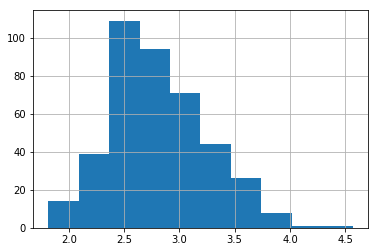

In [21]:
house_size_byWaD.avg_hhsize.hist()

In [22]:
house_size_byWaD.columns.values

array(['supplier_name', 'pwsid', 'Estimate; Total:',
       'Margin of Error; Total:', 'Estimate; Owner occupied:',
       'Margin of Error; Owner occupied:',
       'Estimate; Owner occupied: - 1-person household',
       'Margin of Error; Owner occupied: - 1-person household',
       'Estimate; Owner occupied: - 2-person household',
       'Margin of Error; Owner occupied: - 2-person household',
       'Estimate; Owner occupied: - 3-person household',
       'Margin of Error; Owner occupied: - 3-person household',
       'Estimate; Owner occupied: - 4-person household',
       'Margin of Error; Owner occupied: - 4-person household',
       'Estimate; Owner occupied: - 5-person household',
       'Margin of Error; Owner occupied: - 5-person household',
       'Estimate; Owner occupied: - 6-person household',
       'Margin of Error; Owner occupied: - 6-person household',
       'Estimate; Owner occupied: - 7-or-more person household',
       'Margin of Error; Owner occupied: - 7-or-mo

In [24]:
out_cols = ['supplier_name', 'pwsid', 'Estimate; Total:', 'total_pop', 'avg_hhsize']
house_size_byWaD[out_cols].to_csv("../Demographics_by_Water_District/Census_Data/Water_District_Household_Sizes_2017.csv", index=False)

In [34]:
cols = ['supplier_name', 'pwsid', 'Estimate; Total:',
       'Median Household Income', 'Median Household Income Count']

house_income_byWaD.reset_index()[cols].to_csv('../data/median_income_by_district.csv')

In [5]:
#Downloaded from Census Bureau Fact Finder
race = pd.read_csv('Census_Data/Race/ACS_16_5YR_B02001/ACS_16_5YR_B02001_with_ann.csv', header=1)
print race.shape
race['GEOID10'] = race.Id.apply(lambda x: x[9:])
race.drop(['Id','Id2'],inplace=True, axis=1)
race = race.merge(bg10[['GEOID10','PWSID','PWSID_str']], on ='GEOID10', how='left')
race_byWaD = race.groupby('PWSID').sum()
print race_byWaD.shape
race_byWaD.reset_index(inplace=True)

race_byWaD = race_byWaD.merge(wa_d[['PWSID','supplier_n','geometry']], on='PWSID',how='left')
race_byWaD = gp.GeoDataFrame(race_byWaD[:-1], geometry='geometry')
race_byWaD['Estimate; Total: - Other'] = race_byWaD.iloc[::,13:-2:2].sum(axis=1)
race_byWaD['Margin of Error; Total: - Other'] = race_byWaD.iloc[::,14:-2:2].sum(axis=1)
forper = ['Margin of Error; Total:',
 'Estimate; Total: - White alone',
 'Margin of Error; Total: - White alone',
 'Estimate; Total: - Black or African American alone',
 'Margin of Error; Total: - Black or African American alone',
 'Estimate; Total: - American Indian and Alaska Native alone',
 'Margin of Error; Total: - American Indian and Alaska Native alone',
 'Estimate; Total: - Asian alone',
 'Margin of Error; Total: - Asian alone',
 'Estimate; Total: - Native Hawaiian and Other Pacific Islander alone',
 'Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone',
 'Estimate; Total: - Other',
 'Margin of Error; Total: - Other']
for col in forper:
    race_byWaD['Per_'+col] = (race_byWaD[col]/race_byWaD['Estimate; Total:'])*100
with open('../Data/Supplier/Race_Water_District.geojson', 'w') as f:
    f.write(race_byWaD.to_json()) 

(23212, 23)
(402, 20)


In [6]:
#Downloaded from Census Bureau Fact Finder
edu = pd.read_csv('Census_Data/Education/ACS_16_5YR_B15002/ACS_16_5YR_B15002_with_ann.csv', header=1)
print edu.shape
edu['GEOID10'] = edu.Id.apply(lambda x: x[9:])
edu.drop(['Id','Id2'],inplace=True, axis=1)
edu = edu.merge(bg10[['GEOID10','PWSID','PWSID_str']], on ='GEOID10', how='left')
edu_byWaD = edu.groupby('PWSID').sum()
print edu_byWaD.shape
edu_byWaD.reset_index(inplace=True)
#wa_d.rename(columns={'pwsid':'PWSID'},inplace=True)
edu_byWaD = edu_byWaD.merge(wa_d[['PWSID','supplier_n','geometry']], on='PWSID',how='left')
edu_byWaD = gp.GeoDataFrame(edu_byWaD[:-1], geometry='geometry')
forman = ['Margin of Error; Male:',
 'Estimate; Male: - No schooling completed',
 'Margin of Error; Male: - No schooling completed',
 'Estimate; Male: - Nursery to 4th grade',
 'Margin of Error; Male: - Nursery to 4th grade',
 'Estimate; Male: - 5th and 6th grade',
 'Margin of Error; Male: - 5th and 6th grade',
 'Estimate; Male: - 7th and 8th grade',
 'Margin of Error; Male: - 7th and 8th grade',
 'Estimate; Male: - 9th grade',
 'Margin of Error; Male: - 9th grade',
 'Estimate; Male: - 10th grade',
 'Margin of Error; Male: - 10th grade',
 'Estimate; Male: - 11th grade',
 'Margin of Error; Male: - 11th grade',
 'Estimate; Male: - 12th grade, no diploma',
 'Margin of Error; Male: - 12th grade, no diploma',
 'Estimate; Male: - High school graduate (includes equivalency)',
 'Margin of Error; Male: - High school graduate (includes equivalency)',
 'Estimate; Male: - Some college, less than 1 year',
 'Margin of Error; Male: - Some college, less than 1 year',
 'Estimate; Male: - Some college, 1 or more years, no degree',
 'Margin of Error; Male: - Some college, 1 or more years, no degree',
 "Estimate; Male: - Associate's degree",
 "Margin of Error; Male: - Associate's degree",
 "Estimate; Male: - Bachelor's degree",
 "Margin of Error; Male: - Bachelor's degree",
 "Estimate; Male: - Master's degree",
 "Margin of Error; Male: - Master's degree",
 'Estimate; Male: - Professional school degree',
 'Margin of Error; Male: - Professional school degree',
 'Estimate; Male: - Doctorate degree',
 'Margin of Error; Male: - Doctorate degree']
forwoman = [
 'Margin of Error; Female:',
 'Estimate; Female: - No schooling completed',
 'Margin of Error; Female: - No schooling completed',
 'Estimate; Female: - Nursery to 4th grade',
 'Margin of Error; Female: - Nursery to 4th grade',
 'Estimate; Female: - 5th and 6th grade',
 'Margin of Error; Female: - 5th and 6th grade',
 'Estimate; Female: - 7th and 8th grade',
 'Margin of Error; Female: - 7th and 8th grade',
 'Estimate; Female: - 9th grade',
 'Margin of Error; Female: - 9th grade',
 'Estimate; Female: - 10th grade',
 'Margin of Error; Female: - 10th grade',
 'Estimate; Female: - 11th grade',
 'Margin of Error; Female: - 11th grade',
 'Estimate; Female: - 12th grade, no diploma',
 'Margin of Error; Female: - 12th grade, no diploma',
 'Estimate; Female: - High school graduate (includes equivalency)',
 'Margin of Error; Female: - High school graduate (includes equivalency)',
 'Estimate; Female: - Some college, less than 1 year',
 'Margin of Error; Female: - Some college, less than 1 year',
 'Estimate; Female: - Some college, 1 or more years, no degree',
 'Margin of Error; Female: - Some college, 1 or more years, no degree',
 "Estimate; Female: - Associate's degree",
 "Margin of Error; Female: - Associate's degree",
 "Estimate; Female: - Bachelor's degree",
 "Margin of Error; Female: - Bachelor's degree",
 "Estimate; Female: - Master's degree",
 "Margin of Error; Female: - Master's degree",
 'Estimate; Female: - Professional school degree',
 'Margin of Error; Female: - Professional school degree',
 'Estimate; Female: - Doctorate degree',
 'Margin of Error; Female: - Doctorate degree']

for col in forman:
    edu_byWaD['Per_'+col] = (edu_byWaD[col]/edu_byWaD['Estimate; Male:'])*100
for col in forwoman:
    edu_byWaD['Per_'+col] = (edu_byWaD[col]/edu_byWaD['Estimate; Female:'])*100

for WD in edu_byWaD.index:
    for i in range(len(forman[1::2])):
        if edu_byWaD.loc[WD][forman[1::2][:i]].sum() >= (edu_byWaD.loc[WD,'Estimate; Male:']/float(2)):
            edu_byWaD.loc[WD,'Median Education Male Level'] = forman[1::2][i]
            edu_byWaD.loc[WD,'Median Education Male Count'] = edu_byWaD.loc[WD][forman[1::2][:i]].sum()
            break
    for i in range(len(forwoman[1::2])):
        if edu_byWaD.loc[WD][forwoman[1::2][:i]].sum() >= (edu_byWaD.loc[WD,'Estimate; Female:']/float(2)):
            edu_byWaD.loc[WD,'Median Education Female Level'] = forwoman[1::2][i]
            edu_byWaD.loc[WD,'Median Education Female Count'] = edu_byWaD.loc[WD][forwoman[1::2][:i]].sum()
            break
    for i in range(len(forman[1::2])):
        if edu_byWaD.loc[WD][forman[1::2][:i] + forwoman[1::2][:i]].sum() >= (edu_byWaD.loc[WD,'Estimate; Total:']/float(2)):
            edu_byWaD.loc[WD,'Median Education Total Level'] = forman[1::2][i].replace('Male','Total')
            edu_byWaD.loc[WD,'Median Education Total Count'] = edu_byWaD.loc[WD][forman[1::2][:i] + forwoman[1::2][:i]].sum()
            break

with open('../Data/Supplier/Education_Water_District.geojson', 'w') as f:
    f.write(edu_byWaD.to_json())

(23212, 73)
(402, 70)
